<a href="https://colab.research.google.com/github/sieuthanthu002/bt-AI-2/blob/main/%C4%91k_%C4%91c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


196.9202898550725


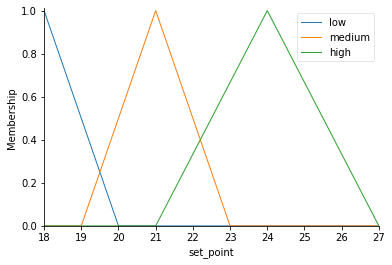

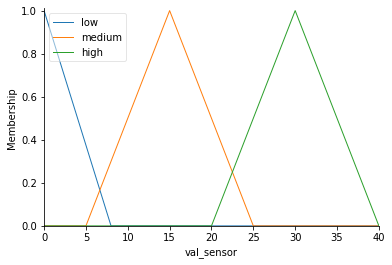

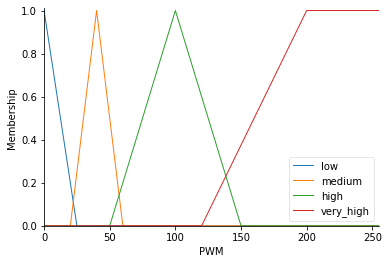

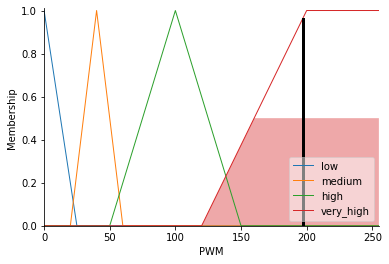

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

set_point = ctrl.Antecedent(np.arange(18,28,1),'set_point')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')
Hz = ctrl.Consequent(np.arange(0,61,1),'Hz')

set_point['low'] = fuzz.trimf(set_point.universe,[18,18,20])
set_point['medium'] = fuzz.trimf(set_point.universe,[19,21,23])
set_point['high'] = fuzz.trimf(set_point.universe,[21,24,27])
val_sensor['low'] = fuzz.trimf(val_sensor.universe,[0,0,8])
val_sensor['medium'] = fuzz.trimf(val_sensor.universe,[5,15,25])
val_sensor['high'] = fuzz.trimf(val_sensor.universe,[20,30,40])
PWM['low'] = fuzz.trimf(PWM.universe,[0,0,25])
PWM['medium'] = fuzz.trimf(PWM.universe,[20,40,60])
PWM['high'] = fuzz.trimf(PWM.universe,[50,100,150])
PWM['very_high'] = fuzz.trapmf(PWM.universe,[120,200,255,255])

set_point.view()
val_sensor.view()
PWM.view()

rule1 = ctrl.Rule(set_point['low'] & val_sensor['low'],PWM['low'])
rule2 = ctrl.Rule(set_point['low'] & val_sensor['medium'],PWM['low'])
rule3 = ctrl.Rule(set_point['low'] & val_sensor['high'],PWM['medium'])
rule4 = ctrl.Rule(set_point['medium'] & val_sensor['low'],PWM['low'])
rule5 = ctrl.Rule(set_point['medium'] & val_sensor['medium'],PWM['medium'])
rule6 = ctrl.Rule(set_point['medium'] & val_sensor['high'],PWM['high'])
rule7 = ctrl.Rule(set_point['high'] & val_sensor['low'],PWM['medium'])
rule8 = ctrl.Rule(set_point['high'] & val_sensor['medium'],PWM['high'])
rule9 = ctrl.Rule(set_point['high'] & val_sensor['high'],PWM['very_high'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
powering = ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['set_point'] = 25
powering.input['val_sensor'] = 35
powering.compute()
print(powering.output['PWM'])
PWM.view(sim=powering)


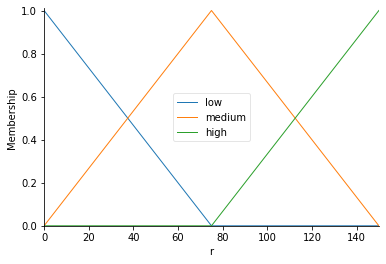

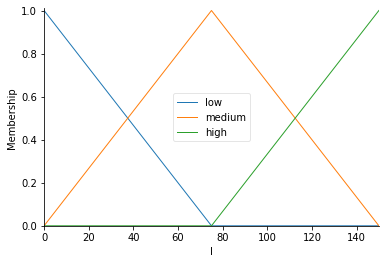

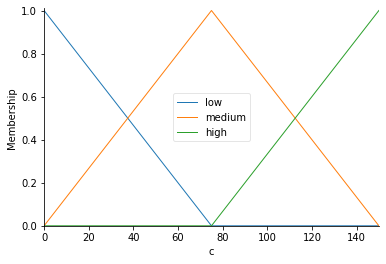

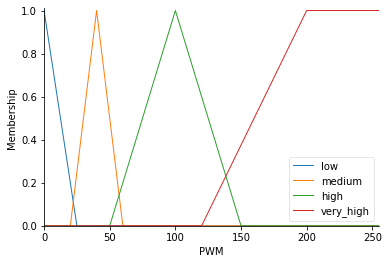

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

r = ctrl.Antecedent(np.arange(0,151,1),'r')
l = ctrl.Antecedent(np.arange(0,151,1),'l')
c = ctrl.Antecedent(np.arange(0,151,1),'c')
PWM_L = ctrl.Consequent(np.arange(0,256,1),'PWM_L')
PWM_R = ctrl.Consequent(np.arange(0,256,1),'PWM_R')
rc = ctrl.Antecedent(np.arange(0,91,1),'rc')
lc = ctrl.Antecedent(np.arange(-90,0,1),'lc')

r['low'] = fuzz.trimf(r.universe,[0,0,75])
r['medium'] = fuzz.trimf(r.universe,[0,75,150])
r['high'] = fuzz.trimf(r.universe,[75,150,150])

l['low'] = fuzz.trimf(l.universe,[0,0,75])
l['medium'] = fuzz.trimf(l.universe,[0,75,150])
l['high'] = fuzz.trimf(l.universe,[75,150,150])

c['low'] = fuzz.trimf(c.universe,[0,0,75])
c['medium'] = fuzz.trimf(c.universe,[0,75,150])
c['high'] = fuzz.trimf(c.universe,[75,150,150])

PWM_L['low'] = fuzz.trimf(PWM_L.universe,[0,0,25])
PWM_L['medium'] = fuzz.trimf(PWM_L.universe,[20,40,60])
PWM_L['high'] = fuzz.trimf(PWM_L.universe,[50,100,150])
PWM_L['very_high'] = fuzz.trapmf(PWM_L.universe,[120,200,255,255])

PWM_R['low'] = fuzz.trimf(PWM_R.universe,[0,0,25])
PWM_R['medium'] = fuzz.trimf(PWM_R.universe,[20,40,60])
PWM_R['high'] = fuzz.trimf(PWM_R.universe,[50,100,150])
PWM_R['very_high'] = fuzz.trapmf(PWM_R.universe,[120,200,255,255])

rc['low'] = fuzz.trimf(rc.universe,[0,0,45])
rc['medium'] = fuzz.trimf(rc.universe,[0,45,90])
rc['high'] = fuzz.trimf(rc.universe,[45,90,90])

lc['low'] = fuzz.trimf(lc.universe,[-90,-90,-45])
lc['medium'] = fuzz.trimf(lc.universe,[-90,-45,0])
lc['high'] = fuzz.trimf(lc.universe,[-45,0,0])

r.view()
l.view()
c.view()
rc.view()
lc.view()
PWM_L.view()
PWM_R.view()


